# **numpy** Polynomial Regression with GD

In [10]:
import numpy as np
import math
import pandas as pd

Recall: $$\vec{\theta}^{n+1}=\vec{\theta}^n-\eta\nabla_{\vec{\theta}}E$$ where
$${\bf\nabla}_{\vec{\theta}}E=\begin{pmatrix} 
\frac{\partial E}{\partial \theta_1}\\ 
\frac{\partial E}{\partial \theta_2}\\ 
\frac{\partial E}{\partial \theta_3} 
\end{pmatrix} $$ That is, GD can be implemented **component-wise** [[selbe Formel wie in Folie 13](https://www.cc.gatech.edu/~bboots3/CS4641-Fall2018/Lecture3/03_LinearRegression.pdf)]
$${\theta}^{n+1}_i={\theta}^n_i-\eta\frac{\partial E}{\partial \theta_i}\,,\quad i=1,2,3\,.$$ where
$$y_{pred}\text{: predicted model function (here: 3rd degree polynomial)}$$
$$y\text{: true function (here: sine)}$$
$$\frac{\partial E}{\partial \theta_i}=\frac{\partial E(y_{pred})}{\partial y_{pred}}\cdot\frac{\partial y_{pred}}{\partial \theta_i}\quad\text{(dot product)},$$ 
$$E(y) = \sum_{n=1}^N(y_{pred}(\vec{\theta})-y)^2,$$
$$y_{pred} = a + bx + cx^2 + dx^3 = \pmb{\theta}^\top\pmb{\phi}(\pmb{x}),$$
$$\vec{\theta} = (a, b, c, d)^\top,$$
$$\pmb{\phi}(\pmb{x})=(1,x,x^2,x^3)^\top.$$

In [5]:
# -*- coding: utf-8 -*-

# Create random input and output data
x = np.linspace(-math.pi, math.pi, 2000)
y = np.sin(x)

# Randomly initialize weights
a = np.random.randn()
b = np.random.randn()
c = np.random.randn()
d = np.random.randn()

learning_rate = 1e-6

for t in range(2000):
    # Forward pass: compute predicted y
    # y = a + b x + c x^2 + d x^3
    y_pred = a + b * x + c * x ** 2 + d * x ** 3

    # Compute and print loss (nach je 100 loop Durchgängen)
    loss = np.square(y_pred - y).sum()
    if t % 100 == 99:      # weil counter t nach 100 loops bei t = 99 ist
        print(t, loss)

    # Backprop to compute gradients of a, b, c, d with respect to loss
    # Kettenregel: dE/dw = dE/dy_pred * dy_pred/dw 
    # 1. dE/dy_pred:
    grad_y_pred = 2.0 * (y_pred - y)
    # 2. dE/dy_pred * dy_pred/dw (dot product):
    grad_a = grad_y_pred.sum()   # weil hier dy_pred/dw = 1
    grad_b = (grad_y_pred * x).sum()
    grad_c = (grad_y_pred * x ** 2).sum()
    grad_d = (grad_y_pred * x ** 3).sum()

    # Update weights
    a -= learning_rate * grad_a
    b -= learning_rate * grad_b
    c -= learning_rate * grad_c
    d -= learning_rate * grad_d

print(f'Result: y = {a} + {b} x + {c} x^2 + {d} x^3')

99 310.6734002758945
199 219.28135791364008
299 155.67466435244282
399 111.36717194273274
499 80.47834194409633
599 58.9275779811094
699 43.88065224401366
799 33.3672376628297
899 26.016383387094592
999 20.873376650243184
1099 17.272824839838854
1199 14.750613997414494
1299 12.982777949226627
1399 11.74301381888267
1499 10.873130188574079
1599 10.262473497824303
1699 9.833593133178905
1799 9.532245444640841
1899 9.320418027027925
1999 9.171458113228551
Result: y = -0.019173687774016075 + 0.8517681150663131 x + 0.00330778019255949 x^2 + -0.09262306178443253 x^3


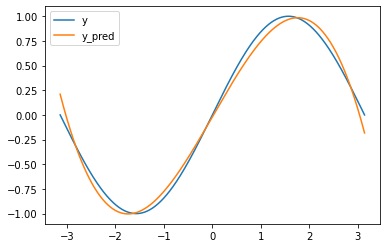

In [6]:
import matplotlib.pyplot as plt

t=np.linspace(-math.pi, math.pi, 10)
plt.plot(x, y, label="y")
plt.plot(x, y_pred, label="y_pred")
plt.legend(loc="upper left")

# **pytorch** Polynomial Regression with GD

In [2]:
# -*- coding: utf-8 -*-

import torch
import math


dtype = torch.float
device = torch.device("cpu")
# device = torch.device("cuda:0") # Uncomment this to run on GPU

# Create random input and output data
x = torch.linspace(-math.pi, math.pi, 2000, device=device, dtype=dtype)
y = torch.sin(x)

# Randomly initialize weights
a = torch.randn((), device=device, dtype=dtype)
b = torch.randn((), device=device, dtype=dtype)
c = torch.randn((), device=device, dtype=dtype)
d = torch.randn((), device=device, dtype=dtype)

learning_rate = 1e-6
for t in range(2000):
    # Forward pass: compute predicted y
    y_pred = a + b * x + c * x ** 2 + d * x ** 3

    # Compute and print loss
    loss = (y_pred - y).pow(2).sum().item()
    if t % 100 == 99:
        print(t, loss)

    # Backprop to compute gradients of a, b, c, d with respect to loss
    grad_y_pred = 2.0 * (y_pred - y)
    grad_a = grad_y_pred.sum()
    grad_b = (grad_y_pred * x).sum()
    grad_c = (grad_y_pred * x ** 2).sum()
    grad_d = (grad_y_pred * x ** 3).sum()

    # Update weights using gradient descent
    a -= learning_rate * grad_a
    b -= learning_rate * grad_b
    c -= learning_rate * grad_c
    d -= learning_rate * grad_d


print(f'Result: y = {a.item()} + {b.item()} x + {c.item()} x^2 + {d.item()} x^3')

99 2649.796875
199 1759.4521484375
299 1169.46484375
399 778.4467163085938
499 519.257080078125
599 347.42279052734375
699 233.48248291015625
799 157.9165802001953
899 107.79084777832031
999 74.53364562988281
1099 52.4633903503418
1199 37.813575744628906
1299 28.086753845214844
1399 21.626901626586914
1499 17.335586547851562
1599 14.483887672424316
1699 12.58830451965332
1799 11.327817916870117
1899 10.489341735839844
1999 9.931400299072266
Result: y = 0.012055261060595512 + 0.8262395858764648 x + -0.0020797327160835266 x^2 + -0.08899185061454773 x^3


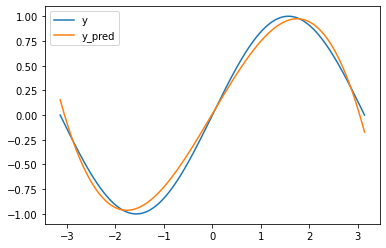

In [4]:
import matplotlib.pyplot as plt
import numpy as np

t=np.linspace(-math.pi, math.pi, 10)
plt.plot(x, y, label="y")
plt.plot(x, y_pred, label="y_pred")
plt.legend(loc="upper left")

************

# MLP in numpy [[Source](https://medium.com/@a.mirzaei69/implement-a-neural-network-from-scratch-with-python-numpy-backpropagation-e82b70caa9bb)]

In [1]:
import numpy as np
from tqdm import tqdm

class NeuralNetwork(object):
    
    def __init__(self, layers = [2 , 10, 1], activations=['sigmoid', 'linear'], random_state=None):
        assert(len(layers) == len(activations)+1)
        self.layers = layers
        self.activations = activations
        self.weights = []
        self.biases = []
        np.random.seed(random_state)
        for i in range(len(layers)-1):
            init_weight, init_bias = self.weightInit(activations[i], layers, i)
            self.weights.append(init_weight)
            self.biases.append(init_bias)
    
    def feedforward(self, x):
        # return the feedforward value for x
        a = np.copy(x)
        z_s = []
        a_s = [a]
        for i in range(len(self.weights)):
            activation_function = self.getActivationFunction(self.activations[i])
            z_s.append(self.weights[i].dot(a) + self.biases[i])
            a = activation_function(z_s[-1])
            a_s.append(a)
        return (z_s, a_s)
    
    def backpropagation(self,y, z_s, a_s):
        dw = []  # dC/dW
        db = []  # dC/dB
        batch_size = y.shape[1]
        deltas = [None] * len(self.weights)  # delta = dC/dZ  known as error for each layer
        # insert the last layer error
        deltas[-1] = (-(y-a_s[-1])/float(batch_size)*(self.getDerivitiveActivationFunction(self.activations[-1]))(z_s[-1]))
        # Perform BackPropagation
        for i in reversed(range(len(deltas)-1)):
            deltas[i] = self.weights[i+1].T.dot(deltas[i+1])*(self.getDerivitiveActivationFunction(self.activations[i])(z_s[i]))        
        #a= [print(d.shape) for d in deltas]
        #batch_size = y.shape[1]
        db = [d.dot(np.ones((batch_size,1))) for d in deltas]
        dw = [d.dot(a_s[i].T) for i,d in enumerate(deltas)]
        # return the derivitives respect to weight matrix and biases
        return dw, db
    
    def train(self, x, y, batch_size=10, epochs=100, lr = 0.01, random_state=None):
        np.random.seed(random_state)
        #lr = lr/float(len(x[0])/batch_size)
        x_temp = np.copy(x)
        y_temp = np.copy(y)
        data_temp = np.append(x_temp.reshape(-1,1), y_temp.reshape(-1,1), axis=1) 
        # update weights and biases based on the output
        for e in tqdm(range(epochs)): 
            np.random.shuffle(data_temp)
            x_temp = data_temp[:,0]
            y_temp = data_temp[:,1]
            i=0            
            while(i<len(y[0])):
                x_batch = x_temp[i:i+batch_size].reshape(1,-1)
                y_batch = y_temp[i:i+batch_size].reshape(1,-1)
                i = i+batch_size
                z_s, a_s = self.feedforward(x_batch)
                dw, db = self.backpropagation(y_batch, z_s, a_s)
                self.weights = [w-lr*dweight for w,dweight in  zip(self.weights, dw)]
                self.biases = [w-lr*dbias for w,dbias in  zip(self.biases, db)]
                #print("loss = {}".format(np.linalg.norm(a_s[-1]-y_batch) ))
        print("loss = {}".format(np.linalg.norm(self.feedforward(x)[1][-1]-y) ))
        
    @staticmethod    
    def getActivationFunction(name):
        if(name == 'sigmoid'):
            return lambda x : np.exp(x)/(1+np.exp(x))
        elif(name == 'linear'):
            return lambda x : x
        elif(name == 'relu'):
            def relu(x):
                y = np.copy(x)
                y[y<0] = 0
                return y
            return relu
        else:
            print('Unknown activation function. linear is used')
            return lambda x: x
    
    @staticmethod
    def getDerivitiveActivationFunction(name):
        if(name == 'sigmoid'):
            sig = lambda x : np.exp(x)/(1+np.exp(x))
            return lambda x :sig(x)*(1-sig(x)) 
        elif(name == 'linear'):
            return lambda x: 1
        elif(name == 'relu'):
            def relu_diff(x):
                y = np.copy(x)
                y[y>=0] = 1
                y[y<0] = 0
                return y
            return relu_diff
        else:
            print('Unknown activation function. linear is used')
            return lambda x: 1
    
    @staticmethod
    def weightInit(activation_name, layers, i):
        if(activation_name in ['sigmoid', 'linear']):    # Glorot initialization
            sigma = np.sqrt(2 / (layers[i]+layers[i+1]))
            weights = np.random.randn(layers[i+1], layers[i]) * sigma
            # Goodfellow: For feedforward neural networks, it is important to initialize 
            # all weights to small random values. The biases may be
            # initialized to zero or to small positive values.
            bias = np.zeros((layers[i+1], 1))
            return weights, bias
        elif(activation_name == 'relu'):   # He initialization
            weights = np.random.randn(layers[i+1], layers[i]) * np.sqrt(2 / (layers[i]))
            bias = np.zeros((layers[i+1], 1))
            return weights, bias
        else:                              # default: Glorot initialization
            print('Unknown weight initialization. Glorot is used.')
            sigma = np.sqrt(2 / (layers[i]+layers[i+1]))
            weights = np.random.randn(layers[i+1], layers[i]) * sigma
            bias = np.zeros((layers[i+1], 1))
            return weights, bias

# Folgendes ist auskommentiert, weil __name__=='__main__' hier zu True auswertet und
# alles ausführt, bevor die class überhaupt definiert ist. 
# (https://www.freecodecamp.org/news/whats-in-a-python-s-name-506262fe61e8/)

#     if __name__=='__main__':
#         import matplotlib.pyplot as plt
#         nn = NeuralNetwork([1, 100, 1],activations=['sigmoid', 'sigmoid'])
#         X = 2*np.pi*np.random.rand(1000).reshape(1, -1)
#         y = np.sin(X)    
        
#         nn.train(X, y, epochs=10000, batch_size=64, lr = .1)
#         _, a_s = nn.feedforward(X)
#         #print(y, X)
#         plt.scatter(X.flatten(), y.flatten())
#         plt.scatter(X.flatten(), a_s[-1].flatten())
#         plt.show()

# Dieser if-Block macht also nur Sinn nach der class Definition (ist 
# auch so gemeint s. Indentation im Artikel):

# if __name__=='__main__':
#     import matplotlib.pyplot as plt
#     nn = NeuralNetwork([1, 100, 1],activations=['sigmoid', 'sigmoid'])
#     X = 2*np.pi*np.random.rand(1000).reshape(1, -1)
#     y = np.sin(X)    

#     nn.train(X, y, epochs=10000, batch_size=64, lr = .1)
#     _, a_s = nn.feedforward(X)
#     #print(y, X)
#     plt.scatter(X.flatten(), y.flatten())
#     plt.scatter(X.flatten(), a_s[-1].flatten())
#     plt.show()

In [2]:
X = 4.*np.pi*np.random.rand(1000).reshape(1, -1) - 2.*np.pi
#y = np.sin(X)
#y = 1/X
#y = np.tan(X)
y = np.exp(X)
#y = 1/(1+np.exp(-X))

In [3]:
import matplotlib.pyplot as plt
%matplotlib ipympl

nn = NeuralNetwork([1, 100, 1],activations=['relu', 'linear'], random_state=42)  # random_state for weight initialization
nn.train(X, y, epochs=100, batch_size=16, lr = .0001, random_state=89)            # random_state for batch shuffling
_, a_s = nn.feedforward(X)
#print(y, X)
plt.scatter(X.flatten(), y.flatten())
plt.scatter(X.flatten(), a_s[-1].flatten())
plt.show()

100%|██████████| 100/100 [00:01<00:00, 50.96it/s]


loss = 691.2011422423172


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

# MLP using MLPRegressor()

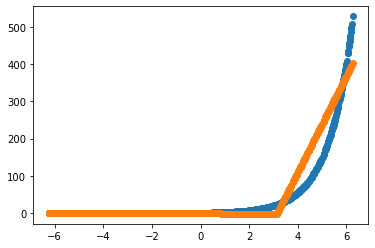

In [133]:
from sklearn.neural_network import MLPRegressor
X_reg=X.reshape(-1,1)
y_reg=y.reshape(-1,)
regr=MLPRegressor(solver='sgd', alpha=0, learning_rate_init=.001, batch_size=100, random_state=1, max_iter=100).fit(X_reg,y_reg)
y_predict=regr.predict(X_reg)
plt.scatter(X_reg.flatten(),y_reg.flatten())
plt.scatter(X_reg.flatten(),y_predict.flatten())
plt.show()

# MLP with plot updates after each epoch

Geht nur im **Terminal**. Hier wird jeder Plot einzeln neu geplottet.

In [15]:
import numpy as np
from tqdm import tqdm

class NeuralNetwork_mit_plot_update(object):
    
    def __init__(self, layers = [2 , 10, 1], activations=['sigmoid', 'linear']):
        assert(len(layers) == len(activations)+1)
        self.layers = layers
        self.activations = activations
        self.weights = []
        self.biases = []
        for i in range(len(layers)-1):
            self.weights.append(np.random.randn(layers[i+1], layers[i]))
            self.biases.append(np.random.randn(layers[i+1], 1))
    
    def feedforward(self, x):
        # return the feedforward value for x
        a = np.copy(x)
        z_s = []
        a_s = [a]
        for i in range(len(self.weights)):
            activation_function = self.getActivationFunction(self.activations[i])
            z_s.append(self.weights[i].dot(a) + self.biases[i])
            a = activation_function(z_s[-1])
            a_s.append(a)
        return (z_s, a_s)
    
    def backpropagation(self,y, z_s, a_s):
        dw = []  # dC/dW
        db = []  # dC/dB
        batch_size = y.shape[1]
        deltas = [None] * len(self.weights)  # delta = dC/dZ  known as error for each layer
        # insert the last layer error
        deltas[-1] = (-(y-a_s[-1])/float(batch_size)*(self.getDerivitiveActivationFunction(self.activations[-1]))(z_s[-1]))
        # Perform BackPropagation
        for i in reversed(range(len(deltas)-1)):
            deltas[i] = self.weights[i+1].T.dot(deltas[i+1])*(self.getDerivitiveActivationFunction(self.activations[i])(z_s[i]))        
        db = [d.dot(np.ones((batch_size,1))) for d in deltas]
        dw = [d.dot(a_s[i].T) for i,d in enumerate(deltas)]
        # return the derivitives respect to weight matrix and biases
        return dw, db
    
    def train(self, x, y, batch_size=10, epochs=100, lr = 0.01):
        x_temp = np.copy(x)
        
#         _, a_s = self.feedforward(x)
#         plt.scatter(x.flatten(), y.flatten(), marker='.', alpha=0.5)
#         plt.scatter(x.flatten(), a_s[-1].flatten(), marker='.', alpha=0.5)
#         plt.ion()
#         plt.show()
#         plt.pause(2)
        #plt.close()
        
        # update weights and biases based on the output
        for e in range(epochs):             
            np.random.shuffle(x_temp[0])
            i=0            
            while(i<len(y[0])):
                x_batch = x_temp[i:i+batch_size].reshape(1,-1)
                y_batch = y_temp[i:i+batch_size].reshape(1,-1)
                i = i+batch_size
                z_s, a_s = self.feedforward(x_batch)
                dw, db = self.backpropagation(y_batch, z_s, a_s)
                self.weights = [w-lr*dweight for w,dweight in  zip(self.weights, dw)]
                self.biases = [w-lr*dbias for w,dbias in  zip(self.biases, db)]
            
#             if (e % 10 == 1):
#                 _, a_s = self.feedforward(x)
#                 plt.scatter(x.flatten(), y.flatten(), marker='.', alpha=0.5)
#                 plt.scatter(x.flatten(), a_s[-1].flatten(), marker='.', alpha=0.5)
#                 plt.pause(1)
#                 plt.close()

        print("loss = {}".format(np.linalg.norm(self.feedforward(x)[1][-1]-y) ))
        
    @staticmethod    
    def getActivationFunction(name):
        if(name == 'sigmoid'):
            return lambda x : np.exp(x)/(1+np.exp(x))
        elif(name == 'linear'):
            return lambda x : x
        elif(name == 'relu'):
            def relu(x):
                y = np.copy(x)
                y[y<0] = 0
                return y
            return relu
        else:
            print('Unknown activation function. linear is used')
            return lambda x: x
    
    @staticmethod
    def getDerivitiveActivationFunction(name):
        if(name == 'sigmoid'):
            sig = lambda x : np.exp(x)/(1+np.exp(x))
            return lambda x :sig(x)*(1-sig(x)) 
        elif(name == 'linear'):
            return lambda x: 1
        elif(name == 'relu'):
            def relu_diff(x):
                y = np.copy(x)
                y[y>=0] = 1
                y[y<0] = 0
                return y
            return relu_diff
        else:
            print('Unknown activation function. linear is used')
            return lambda x: 1

if __name__=='__main__':
    import matplotlib.pyplot as plt
    nn = NeuralNetwork_mit_plot_update([1, 100, 1],activations=['relu', 'linear'])
    X = 4.*np.pi*np.random.rand(1000).reshape(1, -1) - 2.*np.pi
    y = np.exp(X)
    #y = 1/(1+np.exp(-X))    

    nn.train(X, y, epochs=20, batch_size=100, lr = .001)
    _, a_s = nn.feedforward(X)
    plt.scatter(X.flatten(), y.flatten(), marker='.', alpha=0.5)
    plt.scatter(X.flatten(), a_s[-1].flatten(), marker='.', alpha=0.5)
    plt.show()

loss = 1527.7533021544248
